<a href="https://colab.research.google.com/github/DimpySingh001/Foodclassification/blob/main/FoodImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-datasets

In [ ]:
#STEP 2: Import Required Libraries
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np



In [ ]:
#STEP 3: Load the Food-101 Dataset
(ds_train, ds_test), ds_info = tfds.load(
    'food101',
    split=['train', 'validation'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/incomplete.P8V6QD_2.0.0/food101-train.tfrecord*...:   0%|         …

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/incomplete.P8V6QD_2.0.0/food101-validation.tfrecord*...:   0%|    …

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


In [ ]:
#STEP 4: View Dataset Information
print("Total Classes:", ds_info.features['label'].num_classes)
print("Sample Classes:", ds_info.features['label'].names[:10])

Total Classes: 101
Sample Classes: ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito']


In [ ]:
#STEP 5: Preprocess the Images
IMG_SIZE = 224
BATCH_SIZE = 32

def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))  # Resize to 224x224
    image = tf.cast(image, tf.float32) / 255.0             # Normalize pixels [0,1]
    return image, label

# Apply preprocessing to the datasets
ds_train = ds_train.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

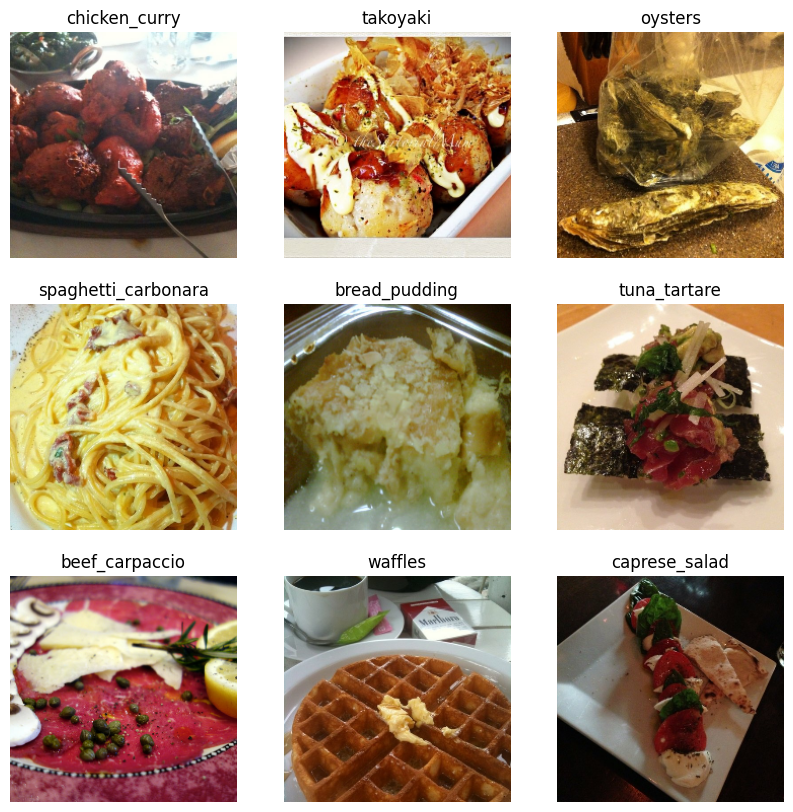

In [ ]:
#STEP 6: Visualize Images
for images, labels in ds_train.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())
        label = ds_info.features['label'].int2str(labels[i].numpy())
        plt.title(label)
        plt.axis("off")
    plt.show()

In [ ]:
pip install tensorflow

In [ ]:
#step 7: Build the CNN model(Transfer learnning)
from tensorflow import keras
base_model=tf.keras.applications.MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable=False #Freeze base layers

model=tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),   #Flatten feature maps
    tf.keras.layers.Dense(101,activation='softmax')  #101 food categories
])


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
#step 8: compile the model
model.compile(
optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy']
)

In [ ]:
#step 9: Train the modle
history = model.fit(ds_train, epochs=5, validation_data=ds_test)

Epoch 1/5
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 4025s 2s/step - accuracy: 0.3784 - loss: 2.6096 - val_accuracy: 0.5720 - val_loss: 1.6361
Epoch 2/5
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 3963s 2s/step - accuracy: 0.5748 - loss: 1.6616 - val_accuracy: 0.5880 - val_loss: 1.5784
Epoch 3/5
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 3907s 2s/step - accuracy: 0.6130 - loss: 1.4941 - val_accuracy: 0.5870 - val_loss: 1.5951
Epoch 4/5
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 3871s 2s/step - accuracy: 0.6408 - loss: 1.3748 - val_accuracy: 0.5851 - val_loss: 1.6321
Epoch 5/5
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 3895s 2s/step - accuracy: 0.6626 - loss: 1.2854 - val_accuracy: 0.5901 - val_loss: 1.6117


In [ ]:
#step 10: Evaluate the model
loss,accuracy=model.evaluate(ds_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

790/790 ━━━━━━━━━━━━━━━━━━━━ 978s 1s/step - accuracy: 0.5923 - loss: 1.6131
Test Accuracy: 59.01%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


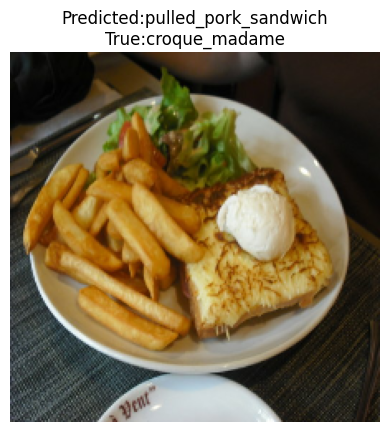

In [ ]:
#step 11: make predictiona & show results
class_names=ds_info.features['label'].names
for images,labels in ds_test.take(1):
  image=images[0]
  true_labels=class_names[labels[0].numpy()]

  prediction=model.predict(tf.expand_dims(image,axis=0))
  predicted_label=class_names[np.argmax(prediction)]

  plt.imshow(image)
  plt.title(f"Predicted:{predicted_label}\nTrue:{true_labels}")
  plt.axis('off')
  plt.show()


In [ ]:
#step 12: save the trained model(optional)
model.save("food101_model.h5")  #save to file
#save the trained model in .h5 format so you can reuse it later